In [10]:
# импортируем подсчёт метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

# передаем предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы
print(homogeneity_score(labels_true=[1, 2, 2, 1, 0], labels_pred=[1, 0, 2, 1, 2]))


0.737175493807016


In [11]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 

In [12]:
# загрузим данные
df = pd.read_csv('housing.csv')
# датасет содержит имя покемона, силу его защиты, атаки и скорость
df.head()


,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806


<AxesSubplot: xlabel='year', ylabel='price'>

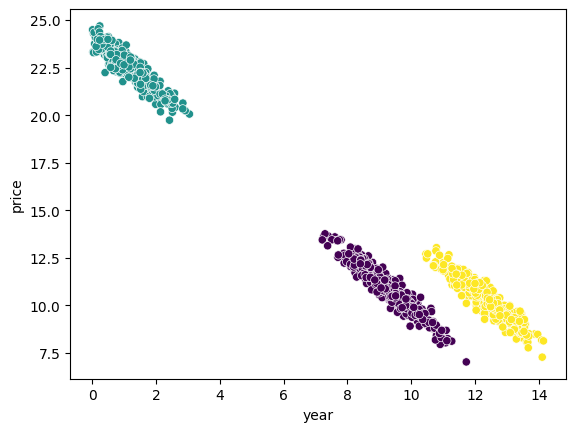

In [13]:
# импортируем библиотеки numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans 

gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(df)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(df)
gm_prediction = pd.DataFrame(gm_prediction)
sns.scatterplot(x=df.year, y=df.price, c=gm_prediction)

<AxesSubplot: xlabel='year', ylabel='price'>

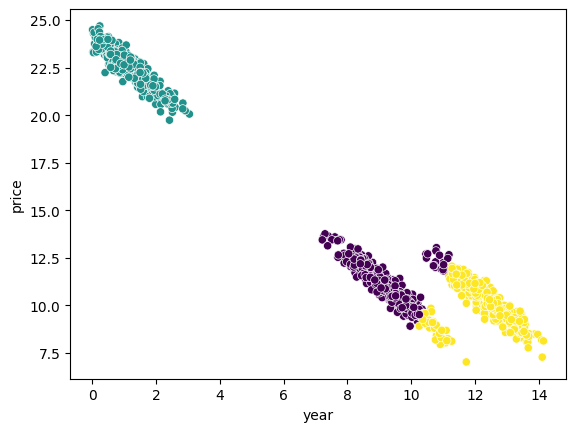

In [15]:
# инициализируем алгоритм k-means, с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(df)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(df)
# если мы хотим метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

#визуализируем результаты, параметр c принимает вектор с номерами классов, для группировки объектов по цветам 
sns.scatterplot(x=df.year, y=df.price, c=predictions)

<AxesSubplot: xlabel='year', ylabel='price'>

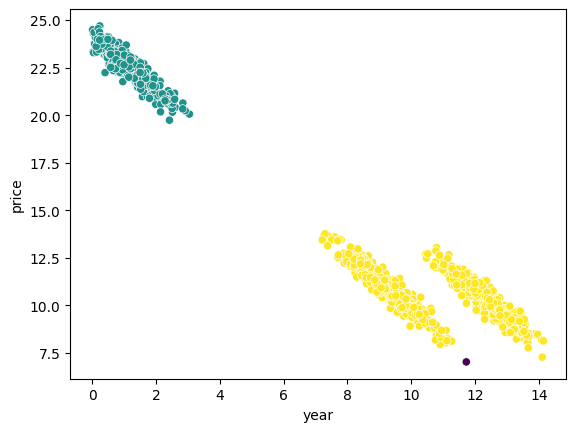

In [23]:
# импортируем DBSCAN кластеризацию
from sklearn.cluster import DBSCAN

#запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=1.15, min_samples=2).fit(df)

# Далее можно визуализировать результаты, как мы делали с алгоритмом k-means
sns.scatterplot(x=df.year, y=df.price, c=clustering.labels_)